In [1]:
# Imports
from src.color_space.all import *
from src.distances import distance_euclidean
from src.print import *
from matplotlib import pyplot as plt

# Constants
PRINT_ARRAY: bool = False
PRINT_IMAGE: bool = False
PRINT_EUCLIDEAN: bool = True
size: int = 2

In [2]:
# Ask user for image size to generate
#size: int = int(input("Enter the size of the image to generate: "))

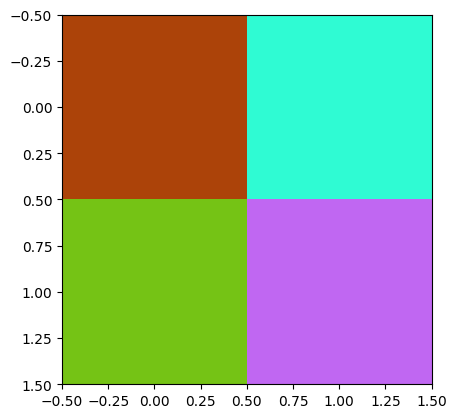

In [3]:
# Generate a random image and plot it
#sliced: np.ndarray = random_image(size, seed = 0, maxi = 5)
sliced: ImageData = random_image(size, seed = 0)
r_image: np.ndarray = sliced_rgb_to_img(sliced.data)
if PRINT_ARRAY:
	print(sliced.data)
	print(r_image)
if PRINT_IMAGE or PRINT_EUCLIDEAN:	# If calculating distance is impossible, plot the image
	plt.imshow(r_image)

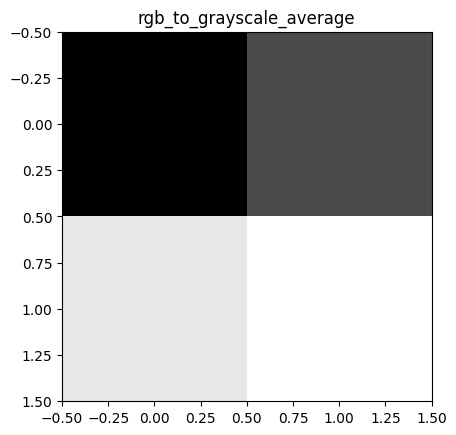

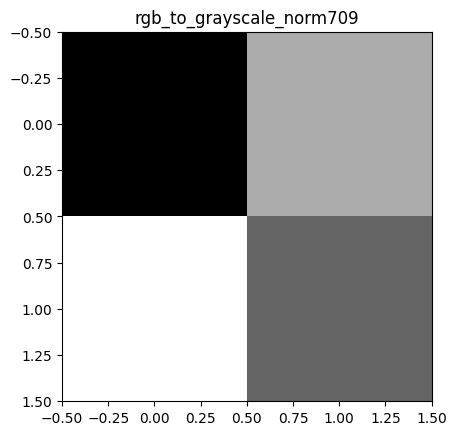

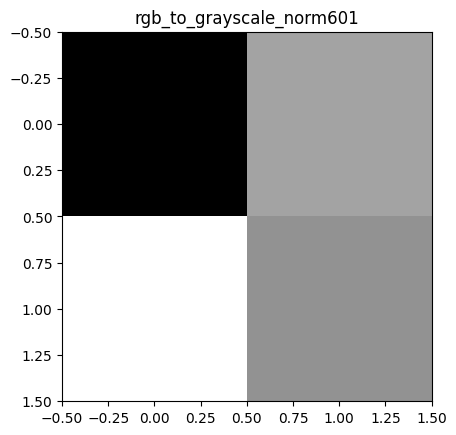

In [4]:
# Niveaux de gris
converters = [rgb_to_grayscale_average, rgb_to_grayscale_norm709, rgb_to_grayscale_norm601]
for f in converters:
	img = f(sliced)
	if PRINT_ARRAY:
		print(img.data)
	if PRINT_IMAGE or PRINT_EUCLIDEAN:
		plt.figure()
		plt.imshow(sliced_rgb_to_img(img.data), cmap = 'gray')
		plt.title(f.__name__)

In [7]:
## Linears
converters: list[tuple] = [
	(rgb_to_yiq, yiq_to_rgb),
	(rgb_to_yuv, yuv_to_rgb),
	(rgb_to_i1i2i3, i1i2i3_to_rgb),
	(rgb_to_rgb_normalized, None)
]
for f, f_inv in converters:
	img = f(sliced)
	if PRINT_ARRAY:
		print(img.data)
	if PRINT_IMAGE:
		plt.figure()
		plt.imshow(sliced_rgb_to_img(img.data))
		plt.title(f.__name__)

	# Calculate the distance between the original image and the double converted image (f_inv(f(img.data)))
	if PRINT_EUCLIDEAN and f_inv is not None:
		distance: float = distance_euclidean(sliced.data, f_inv(f(sliced)).data)
		is_small: bool = distance < 0.1
		print(f"{f.__name__}\t-> {f_inv.__name__}\t= {distance}{' (almost the same)' if is_small else ''}")

rgb_to_yiq	-> yiq_to_rgb	= 5.2814885788587084e-14 (almost the same)
rgb_to_yuv	-> yuv_to_rgb	= 8.774555507236292e-14 (almost the same)
rgb_to_i1i2i3	-> i1i2i3_to_rgb	= 2.3832327871173822e-14 (almost the same)


In [8]:
## Non linears
converters: list[tuple] = [
	(rgb_to_hsl, hsl_to_rgb),
	(rgb_to_hsv, hsv_to_rgb),
	(rgb_to_cmyk, cmyk_to_rgb),
	(rgb_to_lab, lab_to_rgb),
	(rgb_to_luv, luv_to_rgb)
]
for f, f_inv in converters:
	img = f(sliced)
	if PRINT_ARRAY:
		print(img.data)
	if PRINT_IMAGE:
		plt.figure()
		plt.imshow(sliced_rgb_to_img(img.data))
		plt.title(f.__name__)

	# Calculate the distance between the original image and the double converted image (f_inv(f(img)))
	if PRINT_EUCLIDEAN and f_inv is not None:
		distance: float = distance_euclidean(sliced.data, f_inv(f(sliced)).data)
		is_small: bool = distance < 0.1
		print(f"{f.__name__}\t-> {f_inv.__name__}\t= {distance}{' (almost the same)' if is_small else ''}")

rgb_to_hsl	-> hsl_to_rgb	= 9.909460403165833e-14 (almost the same)
rgb_to_hsv	-> hsv_to_rgb	= 7.86426696961181e-14 (almost the same)
rgb_to_cmyk	-> cmyk_to_rgb	= 3.657742603375525e-14 (almost the same)
rgb_to_lab	-> lab_to_rgb	= 0.018416280649712957 (almost the same)
rgb_to_luv	-> luv_to_rgb	= 0.01841628064971777 (almost the same)


In [9]:
## Image indexation
# Indexation for 1x2 image
data: np.ndarray = np.array([[127, 187]])
img: ImageData = ImageData(data, "RGB")
indexed = indexed_single_channel(img, 2)
info(f"Indexed: {indexed.data}, type: {indexed.data.dtype}")

# Multi channel indexation for 3x3x4
data: np.ndarray = np.array([
	[
		[215, 192, 7, 12],
		[48, 39, 136, 0],
		[4, 191, 48, 7],
	],
	[
		[42, 255, 182, 10],
		[30, 150, 200, 90],
		[9, 78, 222, 0],
	],
	[
		[13, 48, 50, 130],
		[130, 48, 0, 150],
		[0, 0, 0, 130],
	],
])
levels: list[int] = [2, 4, 8]
img: ImageData = ImageData(data, "RGB")
indexed = indexed_multi_channels(img, levels)	# 2x4x8 = 64 bins
info(f"Indexed:\n{indexed.data}")

TypeError: unsupported operand type(s) for -: 'ImageData' and 'int'